In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import datasets:

In [2]:
raw_test_results = pd.read_csv("test_results.csv")
raw_user_table = pd.read_csv("user_table.csv")

Merge two dataset using user_id, and drop all samples with missing values.

In [28]:
raw_data = pd.merge(raw_test_results, raw_user_table, on='user_id')
raw_data = raw_data.dropna()
raw_data.head(5)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


Remove timestamp and country columns.

In [29]:
raw_data = raw_data.drop(columns=["timestamp", "country", "test", 'user_id',"city"])
raw_data.head(5)

,source,device,operative_system,price,converted,lat,long
0,ads_facebook,mobile,iOS,39,0,42.89,-78.86
1,seo-google,mobile,android,39,0,44.68,-93.24
2,ads-bing,mobile,android,39,0,41.38,-81.73
3,direct_traffic,mobile,iOS,59,0,35.07,-78.90
4,ads_facebook,web,mac,39,0,39.95,-86.02


In [ ]:
def getTestStatistic(data, feature):
    # Calculate observed conversion rates by group
    grouped = data.groupby([feature])['converted'].mean()
    # Calculate the overall mean conversion rate (as baseline)
    overall_mean = data['converted'].mean()
    # Compute TVD
    tvd = 0.5 * sum(abs(grouped - overall_mean))
    return tvd

Next, we are going to simulate test statistics under null hypothesis by shuffling labels to see the influence of device on test statistics.

In [9]:
def get_shuffled_tbale(table, cata_var, num_var_list):
    """Generate a new table with shuffled catagorical variable"""
    shuffled_column = table[cata_var].sample(frac=1, replace=False).reset_index(drop=True)
    new_table = pd.DataFrame({cata_var: shuffled_column,})
    for num_var in num_var_list:
        new_table[num_var] = table[num_var]
    return new_table    

In [22]:
def do_test(feature, size=1000):
    test_statistics_list = list()
    observed = getTestStatistic(raw_data, feature)  
    for i in range(size):
        test_statistics_list.append(float(getTestStatistic(get_shuffled_tbale(raw_data, feature, ["converted"]), feature)))

    fig, ax = plt.subplots(1)
    sns.histplot(test_statistics_list, bins=60, color="red", label='Simulated Statistics')
    ax.axvline(x=observed, linestyle='-.', color='black', label='measured statsitic')
    ax.legend()
    plt.show()
    p_value1 = (np.array(test_statistics_list) >= observed).sum() / len(test_statistics_list)
    print(f'{p_value1:.50f}')


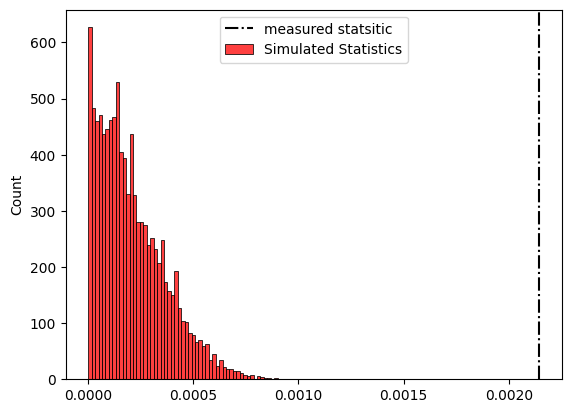

0.00000000000000000000000000000000000000000000000000


In [24]:
do_test("price", 10000)

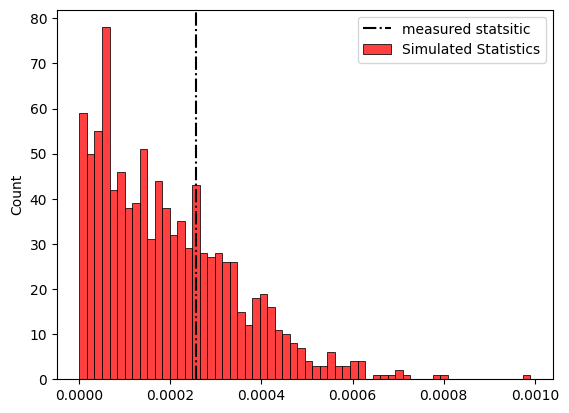

0.311


In [18]:
do_test("device", 1000)

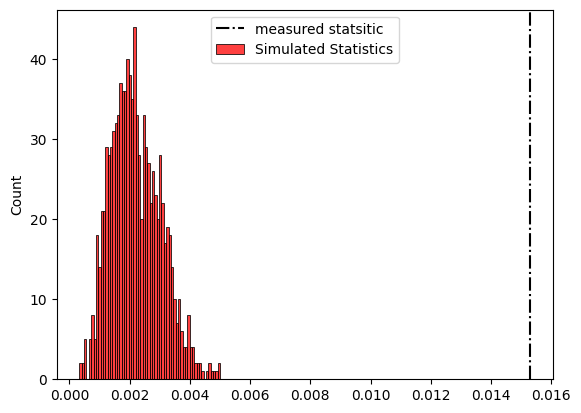

0.0


In [19]:
do_test("operative_system", 1000)

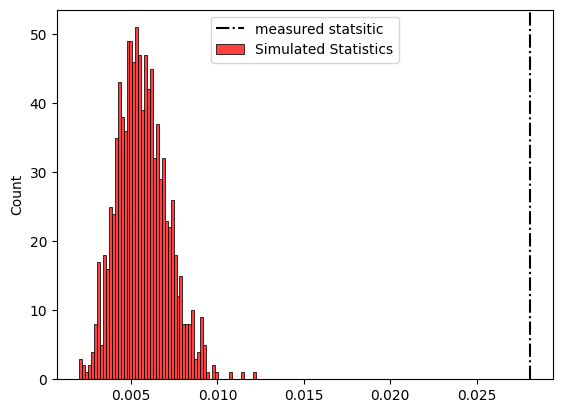

0.0


In [20]:
do_test("source", 1000)

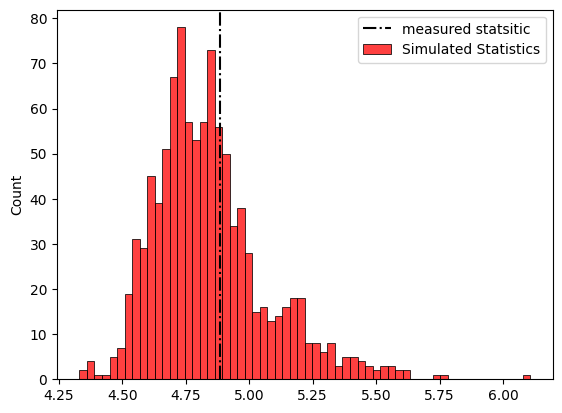

0.34100000000000002531308496145356912165880203247070


In [25]:
do_test("city", 1000)